In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Style, init
init()

### **Q.13**

In [4]:
df_13 = pd.read_parquet('../data/raw/parquets/Q_13_data.parquet')
df_13.head()

,player_id,plays
0,192013,right-handed
1,273680,right-handed
2,77223,right-handed
3,88992,right-handed
4,248846,right-handed


In [ ]:
df_13

In [5]:
print(set(df_13['plays']))

{None, 'left-handed', 'right-handed'}


In [6]:
print(len(df_13) - (133+1013))

1498


1013 133


11.605584642233858


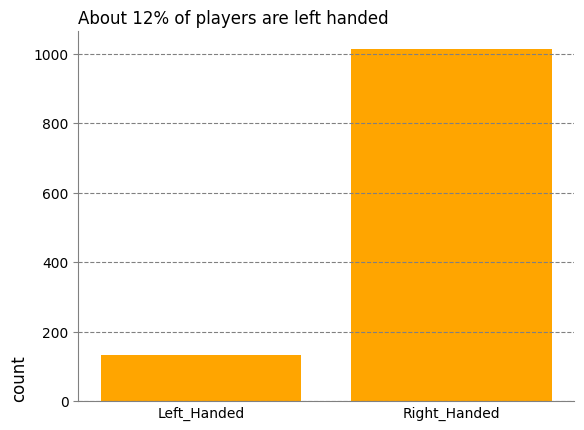

### **Q.14**

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11974049,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6905,None,NaN,False,False,False,False,0,2.0
1,11974052,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6909,None,NaN,False,False,False,False,0,2.0
2,11974053,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6907,None,NaN,False,False,False,False,0,2.0
3,11974065,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6903,None,NaN,False,False,False,False,0,2.0
4,11974066,70826,Qualifiers,qualifiers,None,Davis Cup,davis-cup,6909,None,NaN,False,False,False,False,0,2.0


,ground_type,count
0,Hardcourt outdoor,8093
1,Red clay,5583
2,Hardcourt indoor,2188
3,Grass,267
4,Red clay indoor,236
5,Carpet indoor,126
6,Synthetic outdoor,114
7,Green clay,18


Text(0.0, 1.0, 'Hardcourt outdoor is the most common type of ground')

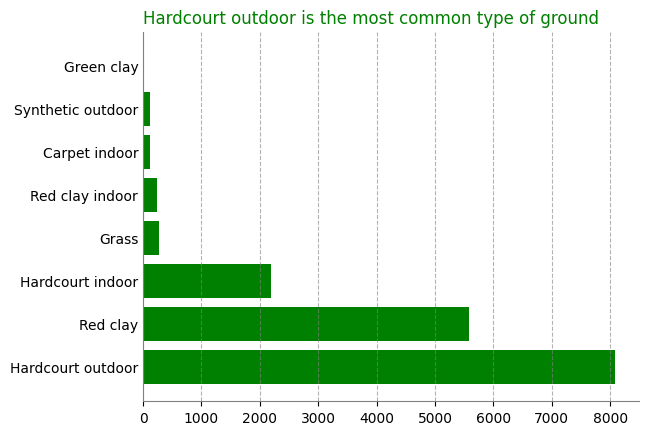

### **Q.15**

***** There are 109 distinct countries in the dataset.


### **Q.16**

### **Q.17**

In [17]:
Q_17_data = pd.read_parquet('../data/raw/parquets/Q_17_data.parquet', engine = 'pyarrow')
Q_17_data.head()

,match_id,break_occurred
0,11998445,False
1,11998445,False
2,11998445,False
3,11998445,False
4,11998445,True


11121


77098


The average number of breaks per match is : 6.93
